# Confidence Interval

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

Here, generate two normal distributions using the numpy random module's normal() method of mass values for men and females.
Using this example data from <a href=https://dfrieds.com/math/confidence-intervals.html>here</a>

In [2]:
np.random.seed(42)
normal_distribution_us_male_mass_pounds = np.random.normal(loc=181, scale=24, size=6000)
normal_distribution_us_female_mass_pounds = np.random.normal(loc=132, scale=22, size=6500)
all_mass_values = np.concatenate((normal_distribution_us_male_mass_pounds, normal_distribution_us_female_mass_pounds), axis=0)
df_ppl_mass = pd.DataFrame(data={'us_people_mass_pounds': all_mass_values})


In [7]:
normal_distribution_us_male_mass_pounds.shape

(6000,)

In [8]:
normal_distribution_us_female_mass_pounds.shape

(6500,)

In [6]:
all_mass_values.shape

(12500,)

In [9]:
df_ppl_mass.head()

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319


In [10]:
df_ppl_mass.shape

(12500, 1)

View Distribution of U.S. People's Mass

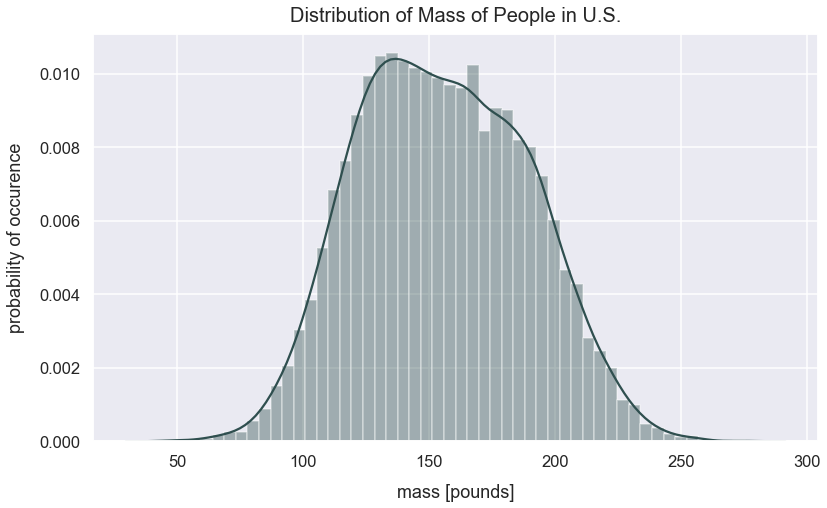

In [17]:
sns.distplot(df_ppl_mass['us_people_mass_pounds'], color="darkslategrey")
plt.xlabel("mass [pounds]", labelpad=14)
plt.ylabel("probability of occurence", labelpad=14)
plt.title("Distribution of Mass of People in U.S.", y=1.015, fontsize=20);

In [18]:
# Calculation Population Mean
pop_mean_mass = df_ppl_mass['us_people_mass_pounds'].mean()
print(pop_mean_mass)

# Calculate Population Standard Deviation
pop_std_dev_mass = df_ppl_mass['us_people_mass_pounds'].std()
print(pop_std_dev_mass)

155.4232805942338
33.585190883958624


Let's sample 25 people who frequent the gym at least three times per week. In statistics, we call this the treatment effect. The dependent variable is still these peoples' mass in pounds.

The mean sample mass of people who frequent the gym at least three times per week is 163 pounds. How this compares to our current population of people's mass. In order to compare this new sample of people from the gym, we need to compare it to an equivalent distribution of sample means from our population.

We need to calculate where this sample mean of 163 pounds would fall on the distribution of sample means from the masses of people from the U.S. population

Given our population mass values, we will take 300 samples each of 25 random values with replacement. For each sample, we will calculate the mean of the sample

In [19]:
# Create List of Sample Means with n = 25
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df_ppl_mass['us_people_mass_pounds'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

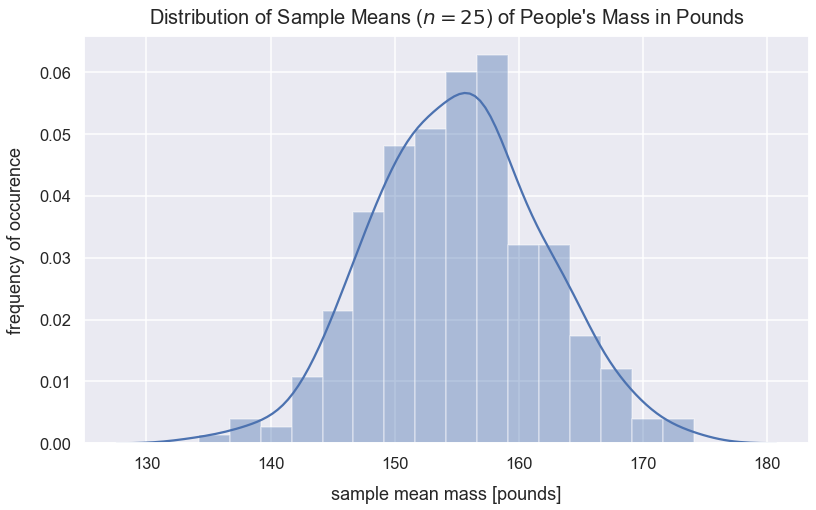

In [20]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

This looks like a normal distribution

In [22]:
# Calculate sample statistics

# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)

# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)

# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)

print(median_of_sample_means)
print(mean_of_sample_means)
print(std_dev_of_sample_means)

155.3008268518431
155.12418330193915
6.734407481483423


In [23]:
gym_sample_mean = 163

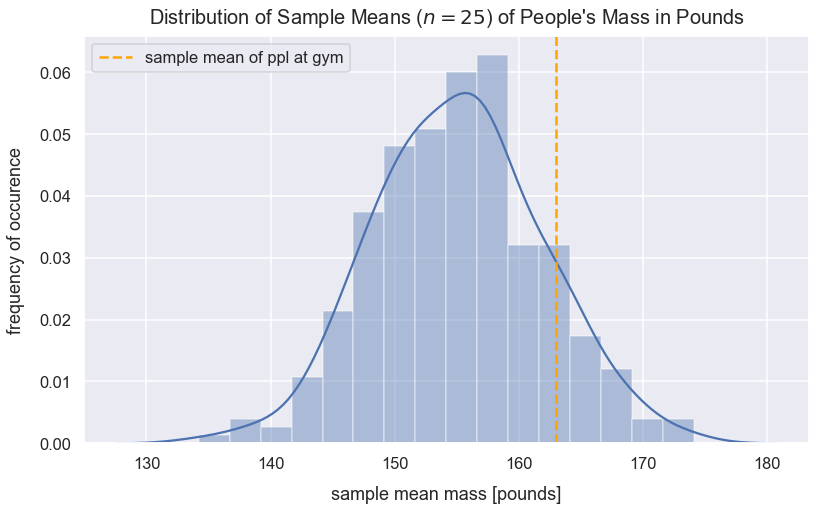

In [24]:
# Visualize Gym Sample Mean Compared to Sampling Distribution
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean of ppl at gym", c='orange')
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();


In [ ]:
# We want to estimate population mean for people going to gym, assuming that stadard deviation is remains the same

In [25]:
standard_error = pop_std_dev_mass/np.sqrt(n)
standard_error

6.717038176791725

In [26]:
# We compute the lower bound of confidence interval
lower_bound_95_perc = gym_sample_mean - 1.96*standard_error
lower_bound_95_perc

149.83460517348823

In [27]:
# We compute the upper bound of confidence interval
upper_bound_95_perc = gym_sample_mean + 1.96*standard_error
upper_bound_95_perc

176.16539482651177

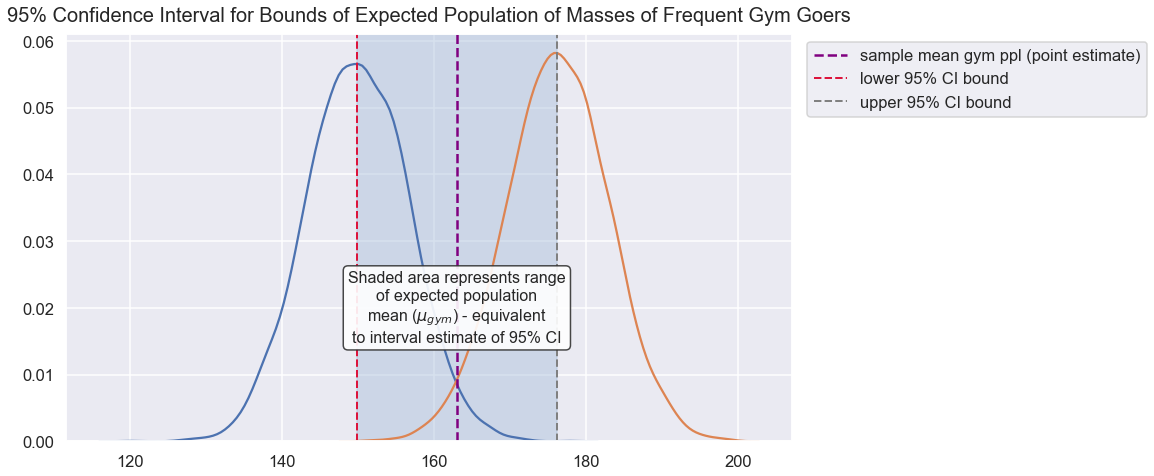

In [28]:
# Visualize 95% Confidence Interval
values = np.random.normal(loc=lower_bound_95_perc, scale=standard_error, size=5000)
sns.distplot(values, hist=False)
values2 = np.random.normal(loc=upper_bound_95_perc, scale=standard_error, size=5000)
sns.distplot(values2, hist=False)
plt.axvline(x=gym_sample_mean, linestyle='--', linewidth=2.5, label="sample mean gym ppl (point estimate)", c='purple')
plt.axvline(x=lower_bound_95_perc, linestyle='--', linewidth=2, c='crimson', label='lower 95% CI bound')
plt.axvline(x=upper_bound_95_perc, linestyle='--', linewidth=2, c='gray', label='upper 95% CI bound')
plt.title("95% Confidence Interval for Bounds of Expected Population of Masses of Frequent Gym Goers", y=1.015, fontsize=20)
bbox_props = dict(boxstyle="round", fc="w", ec="0.2", alpha=0.9)
plt.text(gym_sample_mean, 0.02, "Shaded area represents range\nof expected population\nmean ($\mu_{gym}$) - equivalent\nto interval estimate of 95% CI", ha="center", 
         va="center", size=16, bbox=bbox_props)
plt.axvspan(lower_bound_95_perc, upper_bound_95_perc, alpha=0.5, color='lightsteelblue')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

# Correlation

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

In [30]:
data=sn.load_dataset('iris')

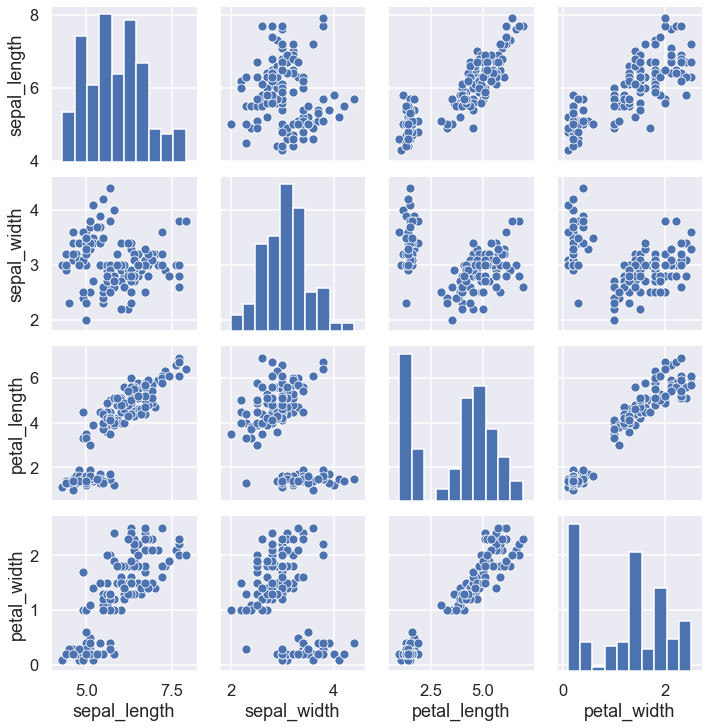

In [31]:
sn.pairplot(data,kind='scatter')

In [32]:
plt.show()

In [33]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


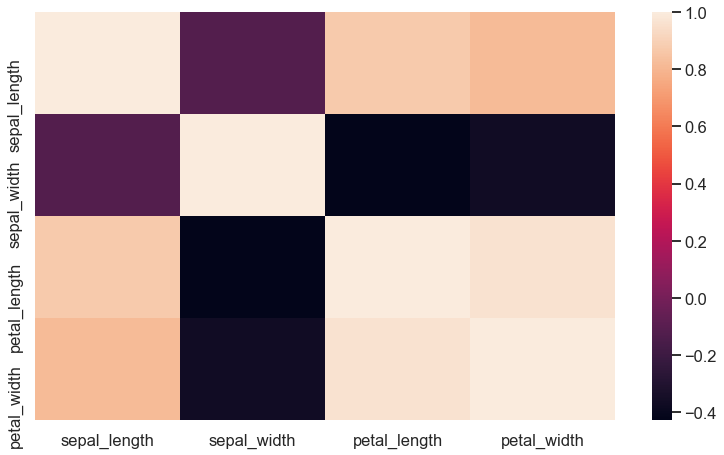

In [34]:
sn.heatmap(data.corr())
plt.show()

In [35]:
# Negative correlation
# Consider the Titanic dataset

titanic = pd.read_csv("titanic.csv")

In [36]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


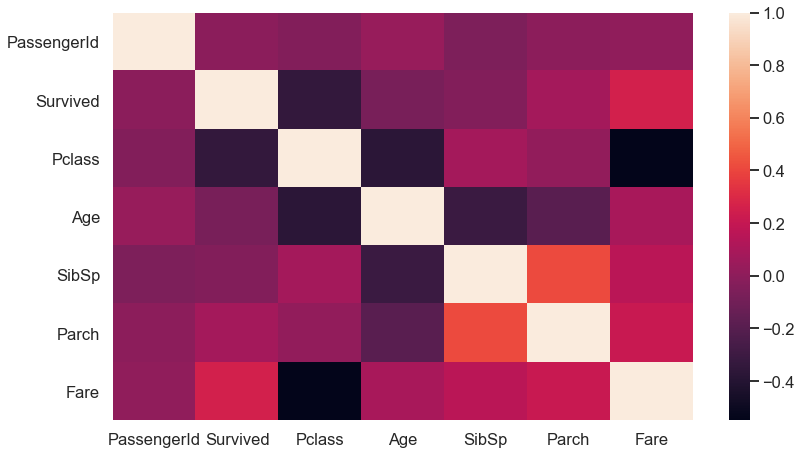

In [37]:
sn.heatmap(titanic.corr())
plt.show()

We can derive the following insights
1. There is a high negative correlation between survival and sex.
2. Survival is not linearly correlated to age, SibSp, or Parch (lack of linear correlation doesn’t cross out the hypothesis of nonlinear correlation).
3. Ticket class is highly correlated with the fare (A first class ticket is more expensive than a third one).